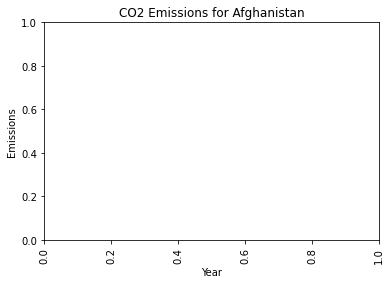

In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

gh_database = pd.read_csv("co2_emissions_kt_by_country.csv")
countries = gh_database['country_name'].unique().tolist()
p = dict(zip(gh_database['country_name'], gh_database['country_code']))



In [81]:
def plotCountryData(country):
    country_data = gh_database[gh_database['country_name'] == country]
    emissions_data = country_data['value']
    years = country_data['year']
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.title(f"CO2 Emissions for {country}")
    plt.plot(years, emissions_data)
    plt.xticks(rotation=90)
    plt.show()


In [82]:
X = gh_database[['country_name', 'year']]
y = gh_database['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_train_encoded['country_name'] = encoder.fit_transform(X_train[['country_name']])
X_test_encoded = X_test.copy()
X_test_encoded['country_name'] = encoder.transform(X_test[['country_name']])

model = LinearRegression()
model.fit(X_train_encoded, y_train)

score = model.score(X_test_encoded, y_test)
print(score)

0.009961307455461088


/home/shravan/.local/lib/python3.10/site-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/shravan/.local/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/shravan/.local/lib/python3.10/site-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/shravan/.local/lib/python3.10/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/shravan/.local/lib/python3.10/site-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and wil

Running on local URL:  http://127.0.0.1:7893

To create a public link, set `share=True` in `launch()`.


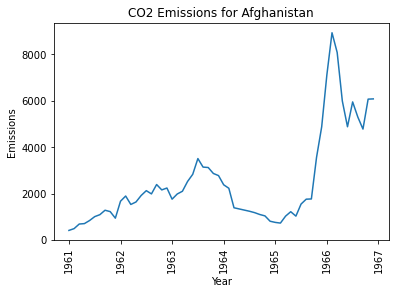

/home/shravan/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/home/shravan/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_5195/576496776.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years,rotation=90)


In [101]:
def predict_emissions(country, year):
    country_encoded = encoder.transform([[country]])
    data = [[country_encoded[0][0], year]]
    prediction = model.predict(data)
    country_data = gh_database[gh_database['country_name'] == country]
    emissions_data = country_data['value']
    years = country_data['year']
    fig, ax = plt.subplots()
    ax.plot(years, emissions_data)
    ax.set_xlabel("Year")
    ax.set_ylabel("Emissions")
    ax.set_title(f"CO2 Emissions for {country}")
    ax.set_xticklabels(years,rotation=90)
    fig.canvas.draw()
    plot_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    plot_img = plot_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.clf()
    return ('{:.2f} metric tons per capita'.format(prediction[0]), plot_img)


inputs = [
    gr.inputs.Dropdown(countries, label='Country'),
    gr.inputs.Slider(minimum=1990, maximum=2030, step=1, default=1999, label='Year')
]

output = [
    gr.outputs.Textbox(label='CO2 Emissions'),
    gr.outputs.Image(type='numpy')
]
interface = gr.Interface(fn=predict_emissions, inputs=inputs, outputs=output, title='CO2 Emissions Predictor')
# plt_interface = gr.Interface(fn=plotCountryData, inputs=inputs[0], outputs="plot", title="CO2 Emissions by Country")
interface.launch()
# plt_interface.launch()
